In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()
df.info()
df.describe()
x = df.iloc[:, [3, 4]].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
cluster_range = range(2, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    if i > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(x, kmeans.labels_))

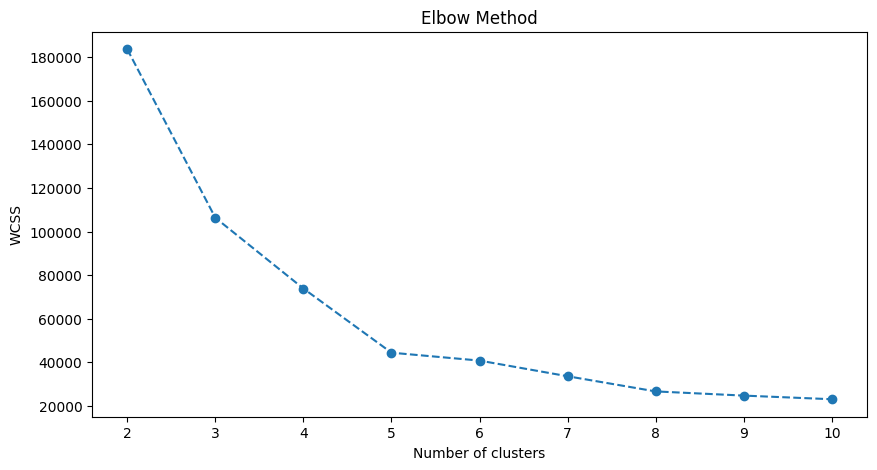

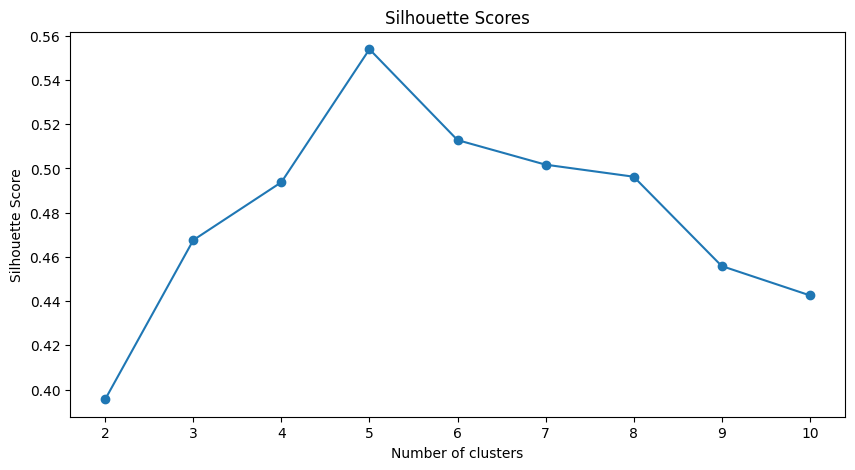

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
df['Cluster'] = y_kmeans

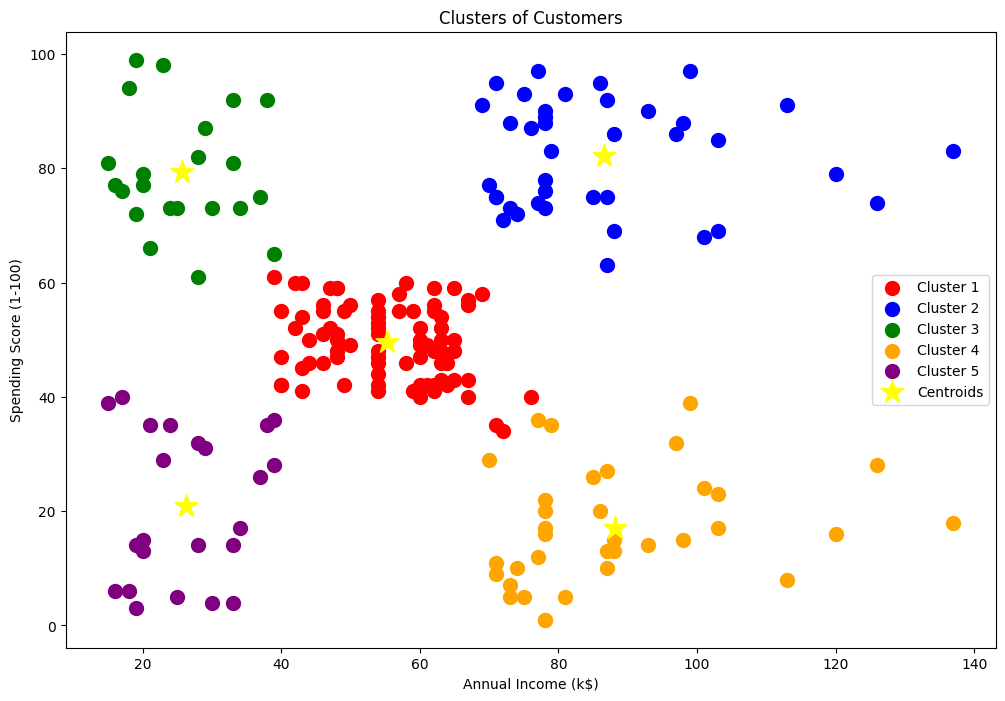

In [ ]:
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(optimal_clusters):
    plt.scatter(x[y_kmeans == i,0], x[y_kmeans == i, 1],
                s=100, c=colors[i], label = f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='*')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print(cluster_summary)

# Interpretation
interpretation = {
    0: "High Income, Low Spending - Potential targets for premium products",
    1: "Moderate Income, Moderate Spending - Average customers",
    2: "High Income, High Spending - Best customers (target for loyalty programs)",
    3: "Low Income, High Spending - Careful with credit risk",
    4: "Low Income, Low Spending - Least profitable segment"
}

for cluster, description in interpretation.items():
    print(f"\nCluster {cluster}: {description}")

               Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        42.716049           55.296296               49.518519     81
1        32.692308           86.538462               82.128205     39
2        25.272727           25.727273               79.363636     22
3        41.114286           88.200000               17.114286     35
4        45.217391           26.304348               20.913043     23

Cluster 0: High Income, Low Spending - Potential targets for premium products

Cluster 1: Moderate Income, Moderate Spending - Average customers

Cluster 2: High Income, High Spending - Best customers (target for loyalty programs)

Cluster 3: Low Income, High Spending - Careful with credit risk

Cluster 4: Low Income, Low Spending - Least profitable segment


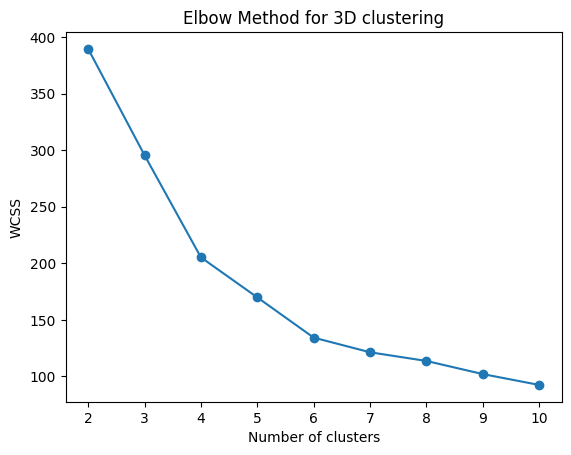

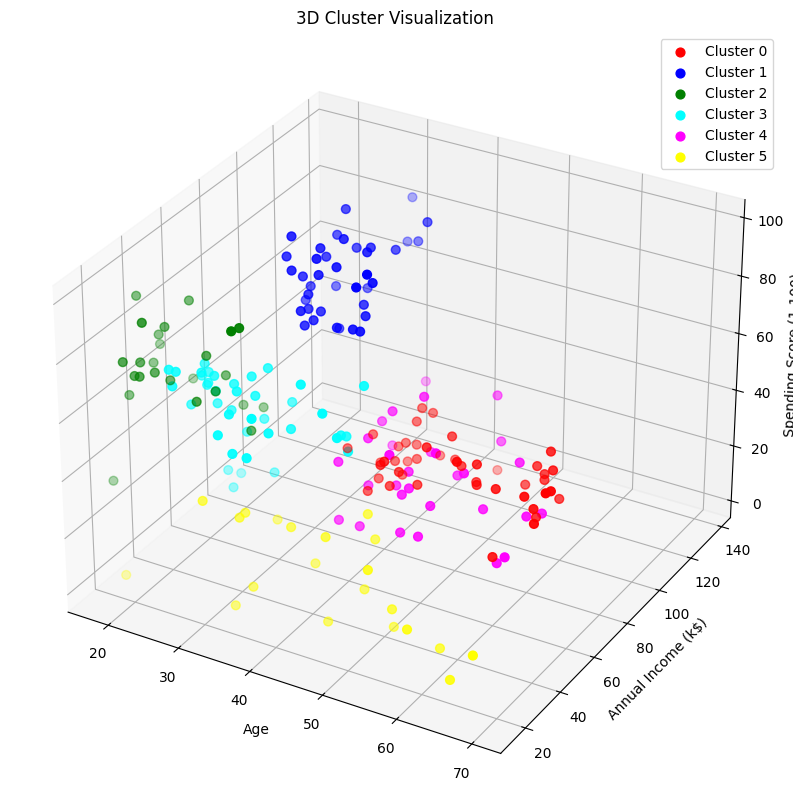

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Find optimal clusters for 3D clustering
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for 3D clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means with 6 clusters for 3D features
kmeans_3d = KMeans(n_clusters=6, random_state=42)
clusters_3d = kmeans_3d.fit_predict(X_scaled)
df['Cluster_3D'] = clusters_3d

# Visualize 3D clusters
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow']
for i in range(6):
    ax.scatter(df[df['Cluster_3D'] == i]['Age'],
               df[df['Cluster_3D'] == i]['Annual Income (k$)'],
               df[df['Cluster_3D'] == i]['Spending Score (1-100)'],
               s=40, color=colors[i], label=f'Cluster {i}')

ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [ ]:
df.to_csv('clustered_data.csv', index=False)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans_3d.cluster_centers_),
                               columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_centers.to_csv('cluster_centers.csv', index=False)